In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
Dataset=pd.read_csv('/content/drive/MyDrive/Machine_Learning/Datasets/Student.csv')
Dataset

,Name of Student,GENERAL APPEARANCE,MANNER OF SPEAKING,PHYSICAL CONDITION,MENTAL ALERTNESS,SELF-CONFIDENCE,ABILITY TO PRESENT IDEAS,COMMUNICATION SKILLS,Student Performance Rating,CLASS
0,Student 1,4,5,4,5,5,5,5,5,Employable
1,Student 2,4,4,4,4,4,4,3,5,Employable
2,Student 3,4,3,3,3,3,3,2,5,LessEmployable
3,Student 4,3,3,3,2,3,3,3,5,LessEmployable
4,Student 5,4,4,3,3,4,4,3,5,Employable
...,...,...,...,...,...,...,...,...,...,...
2977,Student 2996,4,3,3,3,3,3,2,5,Employable
2978,Student 2997,3,4,4,4,4,4,4,5,Employable
2979,Student 2998,4,5,4,5,4,4,4,5,Employable
2980,Student 2999,4,4,4,3,4,4,3,5,LessEmployable


In [4]:
Dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2982 entries, 0 to 2981
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Name of Student             2982 non-null   object
 1   GENERAL APPEARANCE          2982 non-null   int64 
 2   MANNER OF SPEAKING          2982 non-null   int64 
 3   PHYSICAL CONDITION          2982 non-null   int64 
 4   MENTAL ALERTNESS            2982 non-null   int64 
 5   SELF-CONFIDENCE             2982 non-null   int64 
 6   ABILITY TO PRESENT IDEAS    2982 non-null   int64 
 7   COMMUNICATION SKILLS        2982 non-null   int64 
 8   Student Performance Rating  2982 non-null   int64 
 9   CLASS                       2982 non-null   object
dtypes: int64(8), object(2)
memory usage: 233.1+ KB


In [5]:
Dataset.isnull().sum()

Name of Student               0
GENERAL APPEARANCE            0
MANNER OF SPEAKING            0
PHYSICAL CONDITION            0
MENTAL ALERTNESS              0
SELF-CONFIDENCE               0
ABILITY TO PRESENT IDEAS      0
COMMUNICATION SKILLS          0
Student Performance Rating    0
CLASS                         0
dtype: int64

In [6]:
Dataset.describe()

,GENERAL APPEARANCE,MANNER OF SPEAKING,PHYSICAL CONDITION,MENTAL ALERTNESS,SELF-CONFIDENCE,ABILITY TO PRESENT IDEAS,COMMUNICATION SKILLS,Student Performance Rating
count,2982.000000,2982.000000,2982.000000,2982.000000,2982.000000,2982.000000,2982.000000,2982.000000
mean,4.246814,3.884641,3.972166,3.962777,3.910798,3.813883,3.525486,4.610664
std,0.678501,0.757013,0.744135,0.781982,0.807602,0.739390,0.743881,0.692845
min,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000
25%,4.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000
50%,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000
75%,5.000000,4.000000,5.000000,5.000000,5.000000,4.000000,4.000000,5.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


<Axes: xlabel='CLASS', ylabel='count'>

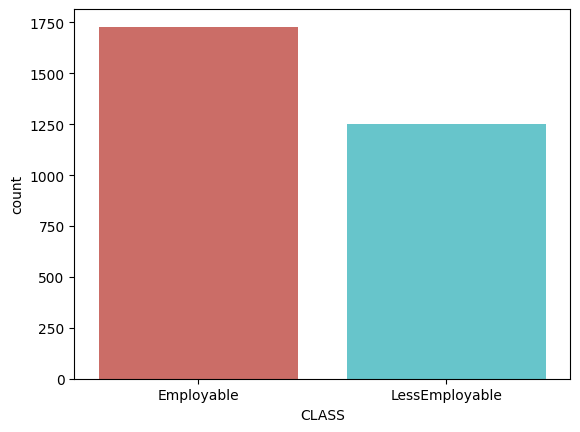

In [7]:
sb.countplot(x='CLASS', data=Dataset, palette='hls')

In [8]:
Dataset.drop('Name of Student', axis=1, inplace=True)

In [9]:
Dataset

,GENERAL APPEARANCE,MANNER OF SPEAKING,PHYSICAL CONDITION,MENTAL ALERTNESS,SELF-CONFIDENCE,ABILITY TO PRESENT IDEAS,COMMUNICATION SKILLS,Student Performance Rating,CLASS
0,4,5,4,5,5,5,5,5,Employable
1,4,4,4,4,4,4,3,5,Employable
2,4,3,3,3,3,3,2,5,LessEmployable
3,3,3,3,2,3,3,3,5,LessEmployable
4,4,4,3,3,4,4,3,5,Employable
...,...,...,...,...,...,...,...,...,...
2977,4,3,3,3,3,3,2,5,Employable
2978,3,4,4,4,4,4,4,5,Employable
2979,4,5,4,5,4,4,4,5,Employable
2980,4,4,4,3,4,4,3,5,LessEmployable


In [10]:
x=Dataset.iloc[:, :-1]
x

,GENERAL APPEARANCE,MANNER OF SPEAKING,PHYSICAL CONDITION,MENTAL ALERTNESS,SELF-CONFIDENCE,ABILITY TO PRESENT IDEAS,COMMUNICATION SKILLS,Student Performance Rating
0,4,5,4,5,5,5,5,5
1,4,4,4,4,4,4,3,5
2,4,3,3,3,3,3,2,5
3,3,3,3,2,3,3,3,5
4,4,4,3,3,4,4,3,5
...,...,...,...,...,...,...,...,...
2977,4,3,3,3,3,3,2,5
2978,3,4,4,4,4,4,4,5
2979,4,5,4,5,4,4,4,5
2980,4,4,4,3,4,4,3,5


In [11]:
y=Dataset.iloc[:, -1:]
y

,CLASS
0,Employable
1,Employable
2,LessEmployable
3,LessEmployable
4,Employable
...,...
2977,Employable
2978,Employable
2979,Employable
2980,LessEmployable


In [12]:
x_train, x_test, y_train, y_test=train_test_split(x, y, stratify=y, random_state=100)

In [13]:
from sklearn.neighbors import KNeighborsClassifier as knn
model=knn(n_neighbors=3)

In [14]:
model.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=3)

In [15]:
y_pred=model.predict(x_test)

In [16]:
from sklearn import metrics

In [17]:
matrix=metrics.confusion_matrix(y_test, y_pred)
print(matrix)

[[390  43]
 [ 38 275]]


In [18]:
accuracy=metrics.accuracy_score(y_test, y_pred)
print('Accuracy - %.2f' %(accuracy*100)+'%')

Accuracy - 89.14%
